## TWINNY  : Réseau social pour sosies 

- La reconnaissance faciale
- L'extraction de différentes caractéristiques de l'image du visage (qui serviront à la comparaison)
- Recherche des caractéristiques similaires
- Retour d'un pourcentage d'exatitude de similarité 

## Importation des bibliotheque

In [ ]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from numpy import asarray
from PIL import Image
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import glob

### Definition du modele  Extraction du visage pour preparation du comparaison : à l'aide du 1er partie du Facenet

In [0]:

def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
    image = plt.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)

    face_images = []

    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face
        face_boundary = image[y1:y2, x1:x2]

        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_images.append(face_array)

    return face_images

In [0]:
def get_model_scores(faces):
    samples = asarray(faces, 'float32')

    # prepare the data for the model
    samples = preprocess_input(samples, version=2)

    # create a vggface model object
    model = VGGFace(model='resnet50',
      include_top=False,
      input_shape=(224, 224, 3),
      pooling='avg')

    # perform prediction
    return model.predict(samples)

### Afficher le contenu des dossier sources : players et actor

['cr3.jpg']
['pepe.jpg']
['bale.jpg']
['messi.jpg']
['cr2.jpg']
['kroos.jpg']
['cr1.jpg']
['Cristiano Ronaldo.jpg']
['marcelo.jpg']


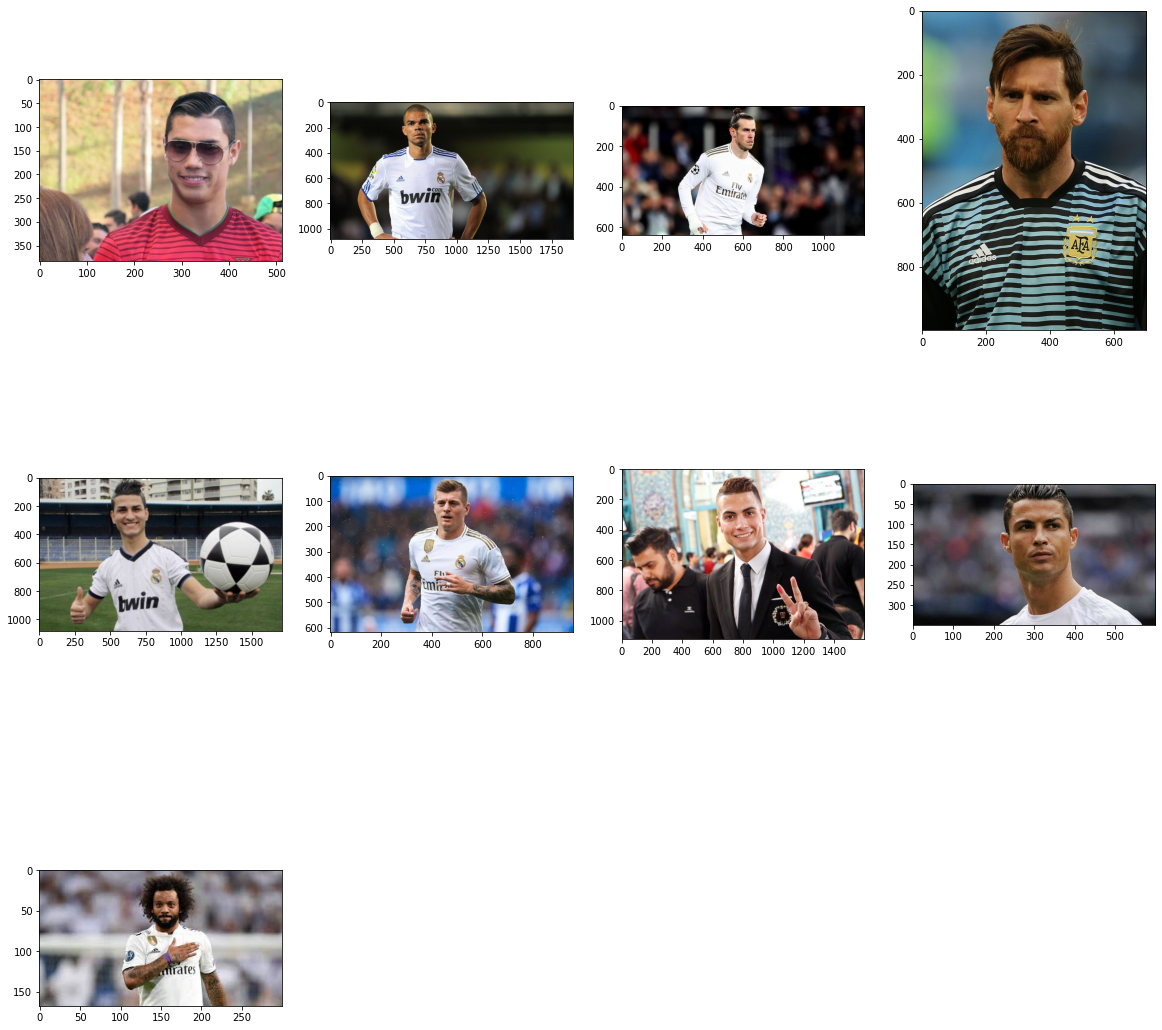

In [26]:
%matplotlib inline
path ="/content/Players"
for root, dirs, files in os.walk(path):  
  for file in files:
    print(file.rsplit('/', 3))
images = []
for img_path in glob.glob('/content/Players/*.jpg'):
    images.append(mpimg.imread(img_path))
    
plt.figure(figsize=(20,20))
columns = 4
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)


### Affecter l'image d'entrer et  affecter un badge de son sosie célèbre en se basant sur le % de similarité.

## pour Cristiano Ronaldo 

 Your Inpute is : 


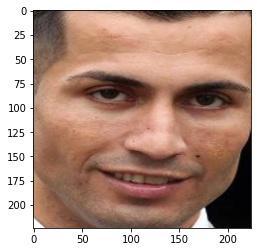

0.6387012302875519
0.6838975548744202
0.6666492223739624
0.7033697962760925
0.4894484877586365
0.6608052253723145
0.41907238960266113
0.407711923122406
0.7316805422306061

 
------------------------------------------------------------------------------------------------------------------------------ 
Groupe de similarities : 


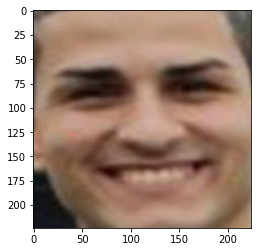

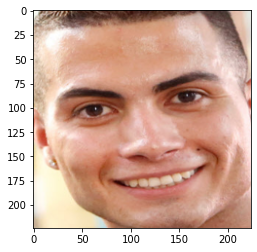

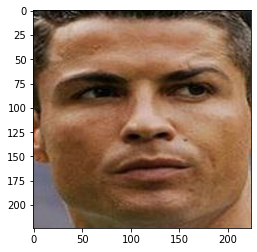


 
------------------------------------------------------------------------------------------------------------------------------ 
Félicitations votre Sosie et le suivant !!!! 


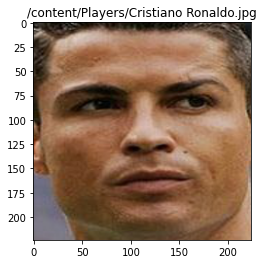

In [28]:
img_dir = "/content/Players"  
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
tej = extract_face_from_image('Player1.jpg')
model= get_model_scores(tej)
plt.imshow(tej[0])
print(" Your Inpute is : ")
plt.show()
results = []
for f1 in files:
    a = str(f1)
    if (a.split('.')[1] == "jpg"):
        celib = extract_face_from_image(a)
        modelCelib= get_model_scores(celib)
        score = cosine(model[0],modelCelib[0])
        print(score)
        if (score <= 0.52):
            results.append((a,celib,score))

print("\n ") 
print("------------------------------------------------------------------------------------------------------------------------------ ") 
print("Groupe de similarities : ")  


for q,r,score in results:
    plt.imshow(r[0])
    plt.show()


print("\n ") 
print("------------------------------------------------------------------------------------------------------------------------------ ") 
print("Félicitations votre Sosie et le suivant !!!! ")
results.sort(key=lambda  tup:tup[2] )
results = results[:1]
for q,r,score in results:
    plt.imshow(r[0])
    plt.title(q)
    plt.show()
    
